<a href="https://colab.research.google.com/github/funmeen/legendary-eureka/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv("/content/Heart.csv")
df


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='Chol'>

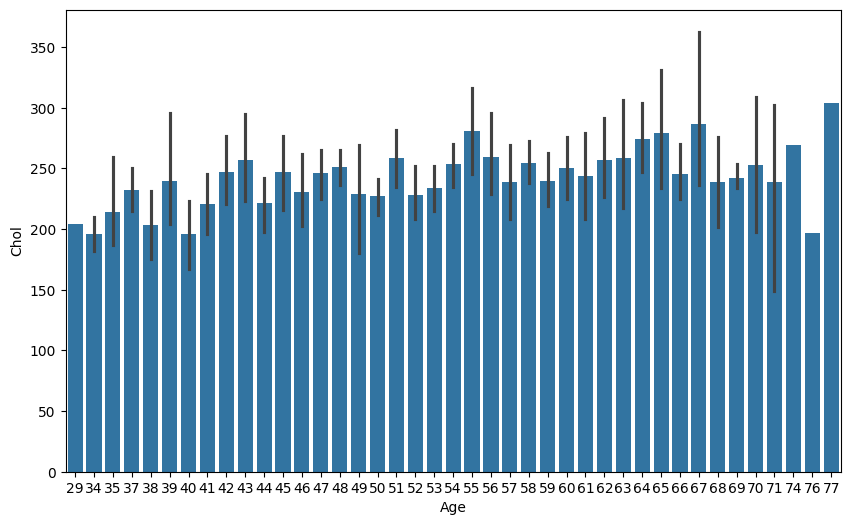

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Age', y = 'Chol', data = df )

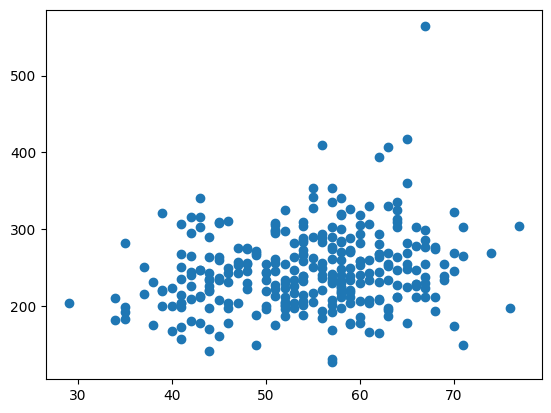

In [35]:
plt.scatter(df.Age, df.Chol)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
x = df.drop('AHD',axis=1)
y = df['AHD']

# Handle categorical data using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in x.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le

# Handle missing values with SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Train the model using the training sets
clf.fit(x_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification)

Accuracy: 0.8289473684210527
Confusion Matrix:
[[33  6]
 [ 7 30]]
Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.85      0.84        39
         Yes       0.83      0.81      0.82        37

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76

